# CELL VIABILITY OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR1.csv").iloc[:, 1:]
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR2.csv').iloc[:, 1:]
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR3.csv').iloc[:, 1:]
lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [3]:
for ii in range(1, r1.columns.size):
    r1.iloc[:, ii] /= r1.iloc[8, ii]
    r2.iloc[:, ii] /= r2.iloc[8, ii]
    r3.iloc[:, ii] /= r3.iloc[8, ii]

In [4]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [5]:
def TransformMatrixForSeaborn(x, l):
    y = pd.DataFrame()
    elapsed, lines, cv = [], [], []
    for idx, row in x.iterrows():
        df = pd.DataFrame(row).T
        elapsed.append(list(df["Elapsed"]) * (df.shape[1] - 1))
        lines.append(list(df.columns[1:]))
        cv.append(df.iloc[0, 1:].values)
    y["Elapsed"] = [e for sl in elapsed for e in sl]
    y["Lines"] = [e for sl in lines for e in sl]
    y["log(fold-change)"] = [e for sl in cv for e in sl]
    return y

## Time Course

### Untreated

In [6]:
r1_ab = r1.loc[:, r1.columns.str.contains('-A/E')]
r1_ab.columns = lines
r2_ab = r2.loc[:, r2.columns.str.contains('-A/E')]
r2_ab.columns = lines
r3_ab = r3.loc[:, r3.columns.str.contains('-A/E')]
r3_ab.columns = lines
# c_ab = pd.concat([r1_ab, r2_ab, r3_ab], axis=1).iloc[:46, :]
c_ab = pd.concat([r1_ab, r2_ab], axis=1).iloc[:41, :]
c_ab.insert(0, "Elapsed", r1.iloc[:, 0])

In [7]:
d = TransformMatrixForSeaborn(c_ab.copy(), lines)

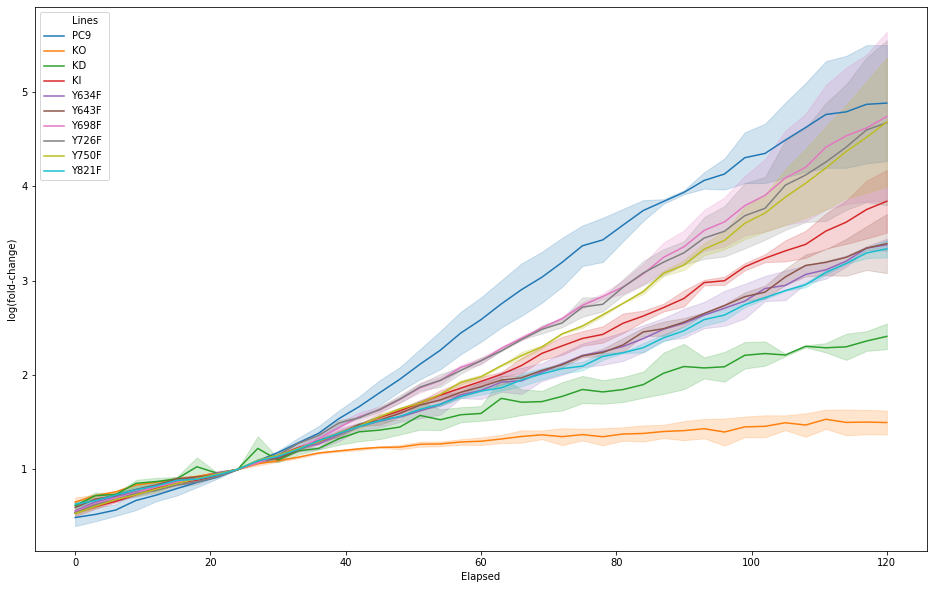

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

sns.lineplot(x="Elapsed", y="log(fold-change)", hue="Lines", data=d, err_style="band", n_boot=100);

In [9]:
# cv1_ab = cv1.loc[:, cv1.columns.str.contains('-A/E')]
# cv2_ab = cv2.loc[:, cv2.columns.str.contains('-A/E')]
# cv3_ab = cv3.loc[:, cv2.columns.str.contains('-A/E')]